In [1]:
## %matplotlib inline : matplotlib graphs will be included in the notebook, next to the code.

%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis :

## Step 1:  Discovering Data(info), Describing Data.

## Step 2:  Tyding Data (outliers, missing values).

## Step 3:  EDA (via visualisation : matplotlib/ seaborn).


### 3.1:  Seaborn(visualizing the distribution of the variable ).** https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial


*Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. Functions that can accomplish this by showing the joint distribution of two variables*.

    1/ Univariate distribution: 
           *sns.distplot() (Histograms)
           *sns.stripplot()
           *swarm plot
           *violin plot
           *sns.kdeplot()
    2/ Bivariate distribution:
            *sns.jointplot(Df, kind='hex/kde/...')
    3/Visualizing pairwise relationships in a dataset:
            *sns.pairplot()
            **heatmaps(covariance)

### 3.2:  Seaborn regression functions (predict y via x "Supervised learning").** https://seaborn.pydata.org/tutorial/regression.html


*The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. That is to say that seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics*.



    1/ sns.regplot 
    2/ sns.lmplot
    3/ sns.residplot
    
**------------------------------------------------------------------------------------------------------------------**

### 3.1:  Seaborn(visualizing the distribution of the variable ).

*Explore how the distribution of a single continuous variable is affected by a second categorical variable.*

    1/ Univariate distribution: 
           *sns.stripplot()
           
*The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.*   

##### sns.stripplot(x='type', y='length', data=df) : produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).

##### Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.
##### Other matplotlib arguments can be passed to sns.stripplot(), e.g., marker, color, size, etc.

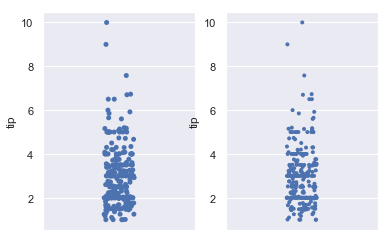

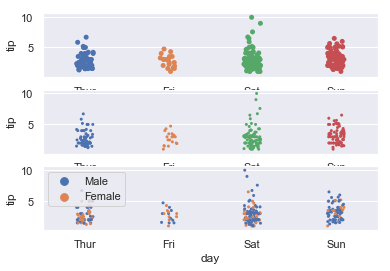

In [64]:
# a strip plot of 'tip'
plt.subplot(1,2,1)
sns.stripplot(y='tip', data=tips)

#a strip plot of 'tip' with spread out data
plt.subplot(1,2,2)
sns.stripplot(y='tip', data=tips,size= 4, jitter= True)
plt.show()


# Make a strip plot of 'tip' grouped by 'days'
plt.subplot(3,1,1)
sns.stripplot(x='day', y='tip', data=tips)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(3,1,2)
sns.stripplot(x='day', y='tip',data=tips,  size= 3, jitter= True) ## we can see on saturday the tips are higher


# Make the strip plot again using jitter and a smaller point size and grouped by sex 
plt.subplot(3,1,3)
sns.stripplot(x='day', y='tip',data=tips,  size= 3, jitter= True, hue='sex') ## we can see thst males tips are higher than females

# Display the plot
plt.legend(loc='upper left')
plt.show()




### 3.1:  Seaborn(visualizing the distribution of the variable ).

    1/ Univariate distribution: 
           *sns.swarmplot()
           
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (sns.swarmplot()), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The syntax for sns.swarmplot() is similar to that of sns.stripplot(), e.g., sns.swarmplot(x='type', y='length', data=df).

The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using orient='h' (horizontal) or orient='v' (vertical).


Another grouping can be added in using the hue keyword. For instance, using sns.swarmplot(x='type', y='length', data=df, hue='build year') makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.

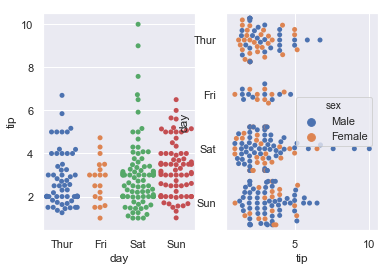

In [74]:
# Generate a swarm plot of 'tip' grouped horizontally by 'day'  
plt.subplot(1,2,1)
sns.swarmplot(x='day', y='tip', data=tips)

# Generate a swarm plot of 'tip' grouped vertically by 'day' with a hue of 'sex'
plt.subplot(1,2,2)
sns.swarmplot(x='tip', y='day', data=tips, orient='h', hue='sex')

# Display the plot
plt.show()

#swarm plot are easier to understand than strip plots because they spread out the points to avoid overlap.

3.1: Seaborn(visualizing the distribution of the variable ).

1/ Univariate distribution: 
       *sns.violinplot()
       
*Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.*

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


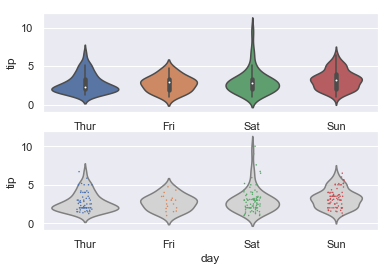

In [76]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='day', y='tip', data=tips)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='lightgray')

# Overlay a strip plot on the violin plot
sns.stripplot(x='day', y='tip', data=tips, size= 1.5, jitter=True)

# Display the plot
plt.show()

##violin plots are a nice way of visualizing the relationship between a continuous variable and a categorical variable.

#### 3.1:  Seaborn(visualizing the distribution of the variable ).
    1/ Bivariate distribution: 
       *sns.joinplot() for bivariate distribution 
       
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's sns.jointplot() provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of sns.lmplot(). By default, calling sns.jointplot(x, y, data) renders a few things:

A scatter plot using the specified columns x and y from the DataFrame data.
A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


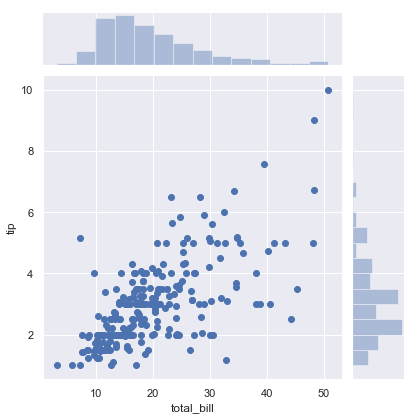

In [79]:
# Generate a joint plot of 'x='total_bill', y='tip'
sns.jointplot(x='total_bill', y='tip', data=tips)

# Display the plot
plt.show()

The seaborn function sns.jointplot() has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

kind='scatter' uses a scatter plot of the data points

kind='reg' uses a regression plot (default order 1)

kind='resid' uses a residual plot

kind='kde' uses a kernel density estimate of the joint distribution

kind='hex' uses a hexbin plot of the joint distribution

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


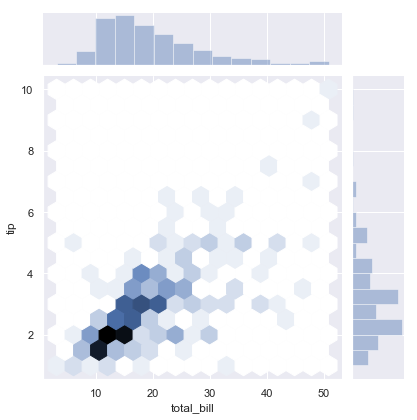

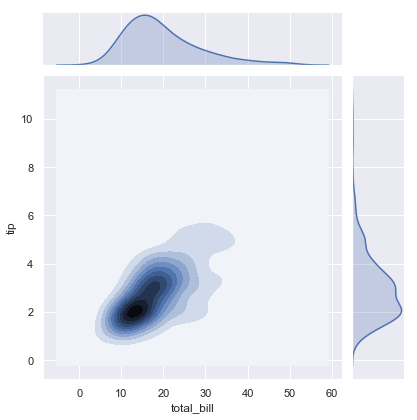

In [99]:
# Generate a joint plot of 'x='total_bill', y='tip' with kind = hex and kde
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
plt.show()

# Generate a joint plot of 'x='total_bill', y='tip' with kind = kde
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')
plt.show()

#### 3.1:  Seaborn(visualizing the distribution of the variable ).
    1/ Multivariate distribution: 
       *sns.pairplot 

Data sets often contain more than two continuous variables. The function sns.jointplot() is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function sns.pairplot() constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

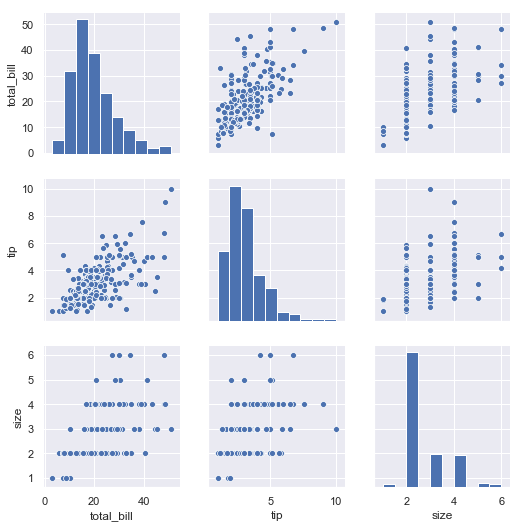

In [100]:
sns.pairplot(tips)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


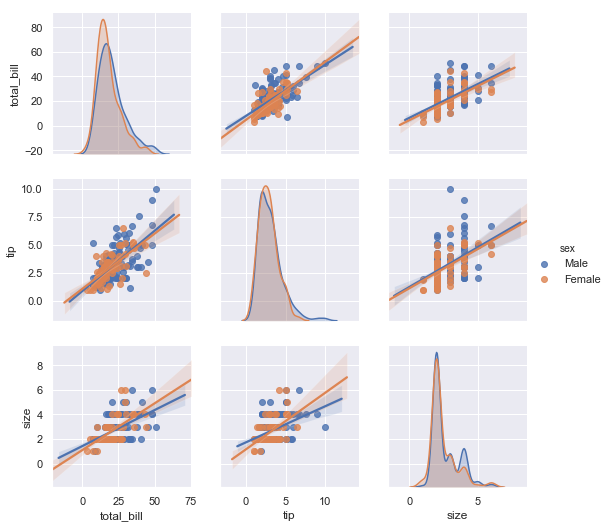

In [102]:
#Displayig regressions as well as scatter plots in the off-diagonal subplots,
#with the argument kind='reg' (where 'reg' means 'regression'). 
#Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
#You will also visualize the joint distributions separated by (groubed using )of hue =sex. 
#You will do this with the keyword argument hue


# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(tips, hue='sex', kind='reg')

# Display the plot
plt.show()

### Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the tips dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

1/ calculate the covariance matrix and save it as df

2/ sns.heatmap(covariance_matrix)

            total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591


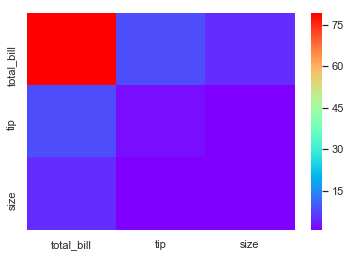

In [117]:
# 1/ calculate the covariance matrix and save it as df
tips2 = pd.read_csv('tips.csv')
cov_matrix = tips2.cov()
print(cov_matrix)

#2/ sns.heatmap(cov_matrix)
sns.heatmap(cov_matrix, cmap='rainbow')
plt.show()

In [125]:
tips2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


#### 3.2 Seaborn Functions to draw linear regression models : 

*Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job*

##### 1/ regplot()
#### Regressions are useful to understand relationships between two continuous variables
#### regplot : captures the relashionship btw 2 variables x='total_bill',  y='tip' (the higher the total bill, the higher tip is paid)
#### regplot : captures the correlation btw 2 variables x='total_bill',  y='tip'.


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


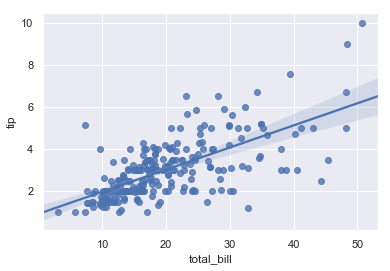

In [19]:
## Load the data tips.csv in Seabon DataSet:
## sns.load_dataset('name') : looks for online csv files on https://github.com/mwaskom/seaborn-data
## sns.load_dataset('name') : returs DataFrame
tips = sns.load_dataset('tips')

# ploting linear regression model : regplot()
sns.regplot(x='total_bill', y='tip', data=tips) 
sns.set()
plt.show()

# we can use color parameter to change the color of the regression line
# i.e : sns.regplot(x='total_bill', y='tip', color= 'blue', data=tips)

#### 3.2 Seaborn Functions to draw linear regression models : 

##### 2/ lmplot() : ploting 2 quantitative variables 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


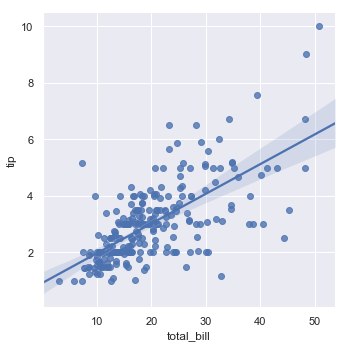

In [32]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


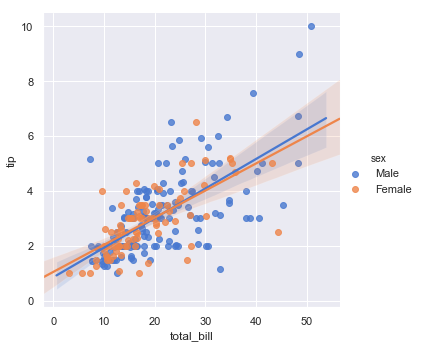

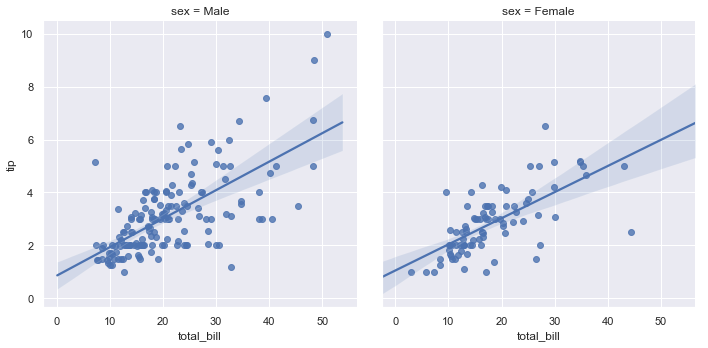

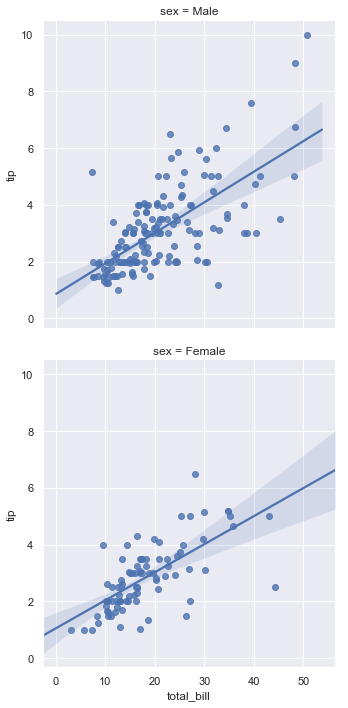

In [41]:
# we can use a factorial/categorical variable (ex: 'sex' or 'smoker') to fit a linear regression for each categories
# ex : males and females in one graph to see who tips 

#grouping by hue 
# palette= changes the color of the regression line
sns.lmplot(x="total_bill", y="tip", hue="sex", palette='muted',data=tips)
plt.show()


# Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots

#group by column usin col == in separate subplots stacked horizontally 
# To plot the previous regression lines in separete graph we specify the prarameter col= instead of hue
# this way we see clearly how the regression fits each categroy : Males and Females
sns.lmplot(x="total_bill", y="tip", col="sex",data=tips)
plt.show()

# group by row== in separate subplots stacked vertically
sns.lmplot(x="total_bill", y="tip", row="sex",data=tips)
plt.show()

## it looks like the male tend to give higher tips. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


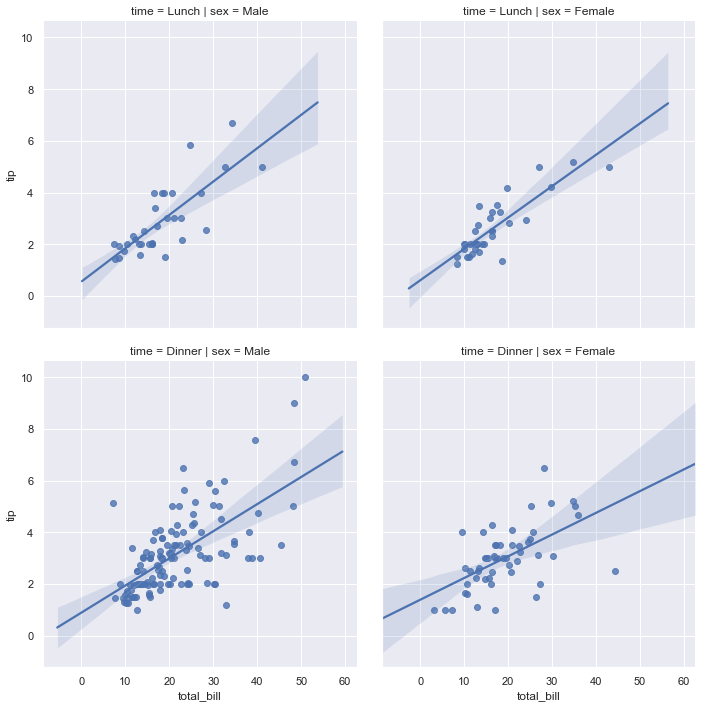

In [28]:
# An other useful thing is that we can plot each category in a plot and creat a subplot for each category to see 
# who tips more females or males and in wich time dinner or lunch

sns.lmplot(x="total_bill", y="tip", row="time", col="sex", data=tips)

# the diffrence here is that we separate categories by time and the sex
#sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


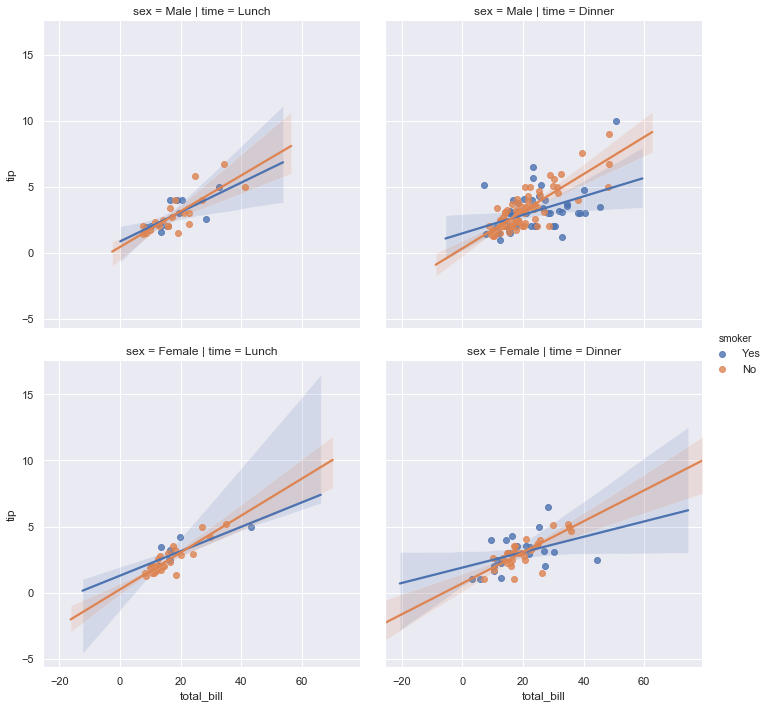

In [30]:
# we can see who tips more smokers or not smokers in each category (males or females)and for the diffrent time(lunch of dinner) :
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips);
plt.show()

### Note : Higher-order regressions
*When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders*.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


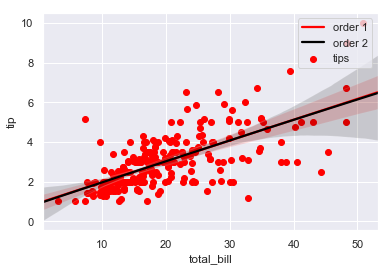

In [40]:
## we are going to plot the 2 diffrent linear regression plots in scatter plot (calling the plt.show one time for)
## the keyword order is used to control the order of polynomial regression.

# Generate a scatter plot of 'weight' and 'mpg' using red circles( marker='o')
plt.scatter(tips['total_bill'], tips['tip'], label='tips', color='red', marker='o')

# Plot in blue a linear regression of order 1 (default) between 'weight' and 'mpg' 
sns.regplot(x='total_bill', y='tip', data=tips, scatter=None, color='red', label='order 1')

# Plot in green a linear regression of order 2 (specify order=2) between 'weight' and 'mpg'
sns.regplot(x='total_bill', y='tip', data=tips, scatter=None, order=2, color='black', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right'
plt.show()


#in this case the linear regression of order 1 and 2 are ploted on each other because there isn't a complex relashionship
# but we can spot the change in the confidence interval on the second regression order. 

#### 3.2 Seaborn Functions to draw linear regression models : 

##### 2/ lmplot() : ploting quantitative variable vs  discrect variable 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


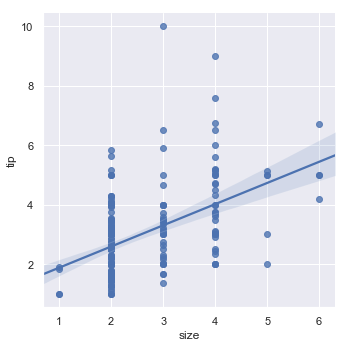

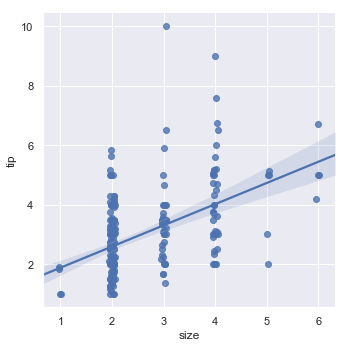

In [34]:
sns.lmplot(x="size", y="tip", data=tips);
plt.show()

# we can add the noise to optimize the regression line 

sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);
plt.show()